<a href="https://colab.research.google.com/github/akulvinod/Projects/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AKUL VINOD
https://colab.research.google.com/drive/17vhFouptDAaCYrUmMjIh1bbqGZWEItSj?usp=sharing

# LoanTap Logistic Regression

**LoanTap** is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- 1 Personal Loan
- 2 EMI Free Loan
- 3 Personal Overdraft
- 4 Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:** Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [17]:
df  = pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [18]:
# Shape of the dataset
print("No. of rows : ",df.shape[0])
print("No. of columns : ",df.shape[1])

No. of rows :  396030
No. of columns :  27


In [19]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'], dtype='object')

In [20]:
#No. of unique values for each columns
df.nunique()

,0
loan_amnt,1397
term,2
int_rate,566
installment,55706
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
annual_inc,27197


In [21]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [23]:
#Converting string to date-time format
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [24]:
#Need to fix the issue on title column
df['title'].value_counts()[:10]

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
Major purchase,4769
Consolidation,3852
debt consolidation,3547
Business,2949


In [25]:
df['title']=df.title.str.lower()
df['title'].value_counts()[:10]

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583
major purchase,4998
debt consolidation loan,3513
business,3017
medical expenses,2820


In [26]:
# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]
# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df['address'].fillna('').apply(lambda x: x[-5:])

In [27]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

In [29]:
# Statistical summary of the dataset
df.describe().round(2)

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030,396030.00,396030,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,2014-02-02 15:57:58.045602560,17.38,1998-05-03 09:34:15.062495488,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
min,500.00,5.32,16.08,0.00,2007-06-01 00:00:00,0.00,1944-01-01 00:00:00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,2013-05-01 00:00:00,11.28,1994-10-01 00:00:00,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,2014-04-01 00:00:00,16.91,1999-09-01 00:00:00,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,2015-03-01 00:00:00,22.98,2003-04-01 00:00:00,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,2016-12-01 00:00:00,9999.00,2013-10-01 00:00:00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00
std,8357.44,4.47,250.73,61637.62,NaN,18.02,NaN,5.14,0.53,20591.84,24.45,11.89,2.15,0.36


- Nearly 80% of the loans have a term of 36 months.
- The majority of loans (30%) are graded as B, followed by C, A, and D respectively.
- For 50% of cases, the type of home ownership is mortgage.
- The loan status target variable is biased towards fully-paid loans, with defaulters accounting for approximately 25% of fully-paid instances.
-  Approximately 85% of applicants do not have a public record or have not filed for bankruptcy.
- Nearly all applicants (99%) have applied under the 'individual' application type.
-The most common purpose for taking out loans is debt consolidation, accounting for 55%, followed by 20% for credit card purposes.

In [30]:
# Checking the distribution of the outcome labels
df.loan_status.value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


- 80% belongs to the class 0 : which is loan fully paid.
- 20% belongs to the class 1 : which were charged off.

**As we can see, there is an imbalance in the data**

In [31]:
df.initial_list_status.value_counts(normalize=True)*100

,proportion
initial_list_status,
f,60.113123
w,39.886877


- 60% belongs to whole loans(w)
- 40% belongs to fractional loans(f)

In [32]:
df.application_type.value_counts(normalize=True)*100

,proportion
application_type,
INDIVIDUAL,99.820468
JOINT,0.107315
DIRECT_PAY,0.072217


- Maximum belongs to INDIVIDUAL application

In [33]:
df.term.value_counts(normalize=True)*100

,proportion
term,
36 months,76.258112
60 months,23.741888


36-month loan terms apply to 76% of the loans, while 60-month loan terms apply to 24% of them.

In [34]:
# The home ownership status provided by the borrower during registration or obtained from the credit report.
df.home_ownership.value_counts(normalize=True)*100

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


- 50% loans belongs to mortgage
- 40% loans belongs to rent

In [35]:
df.verification_status.value_counts(normalize=True)*100

,proportion
verification_status,
Verified,35.240512
Source Verified,33.175517
Not Verified,31.583971


In [36]:
df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<Axes: xlabel='loan_amnt', ylabel='loan_status'>

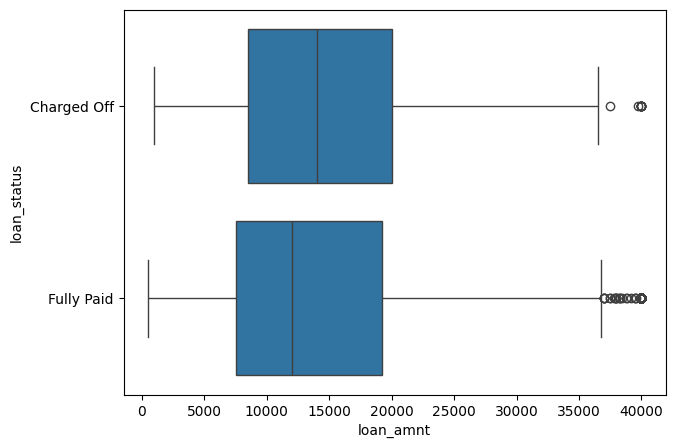

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["loan_amnt"], y=df["loan_status"])

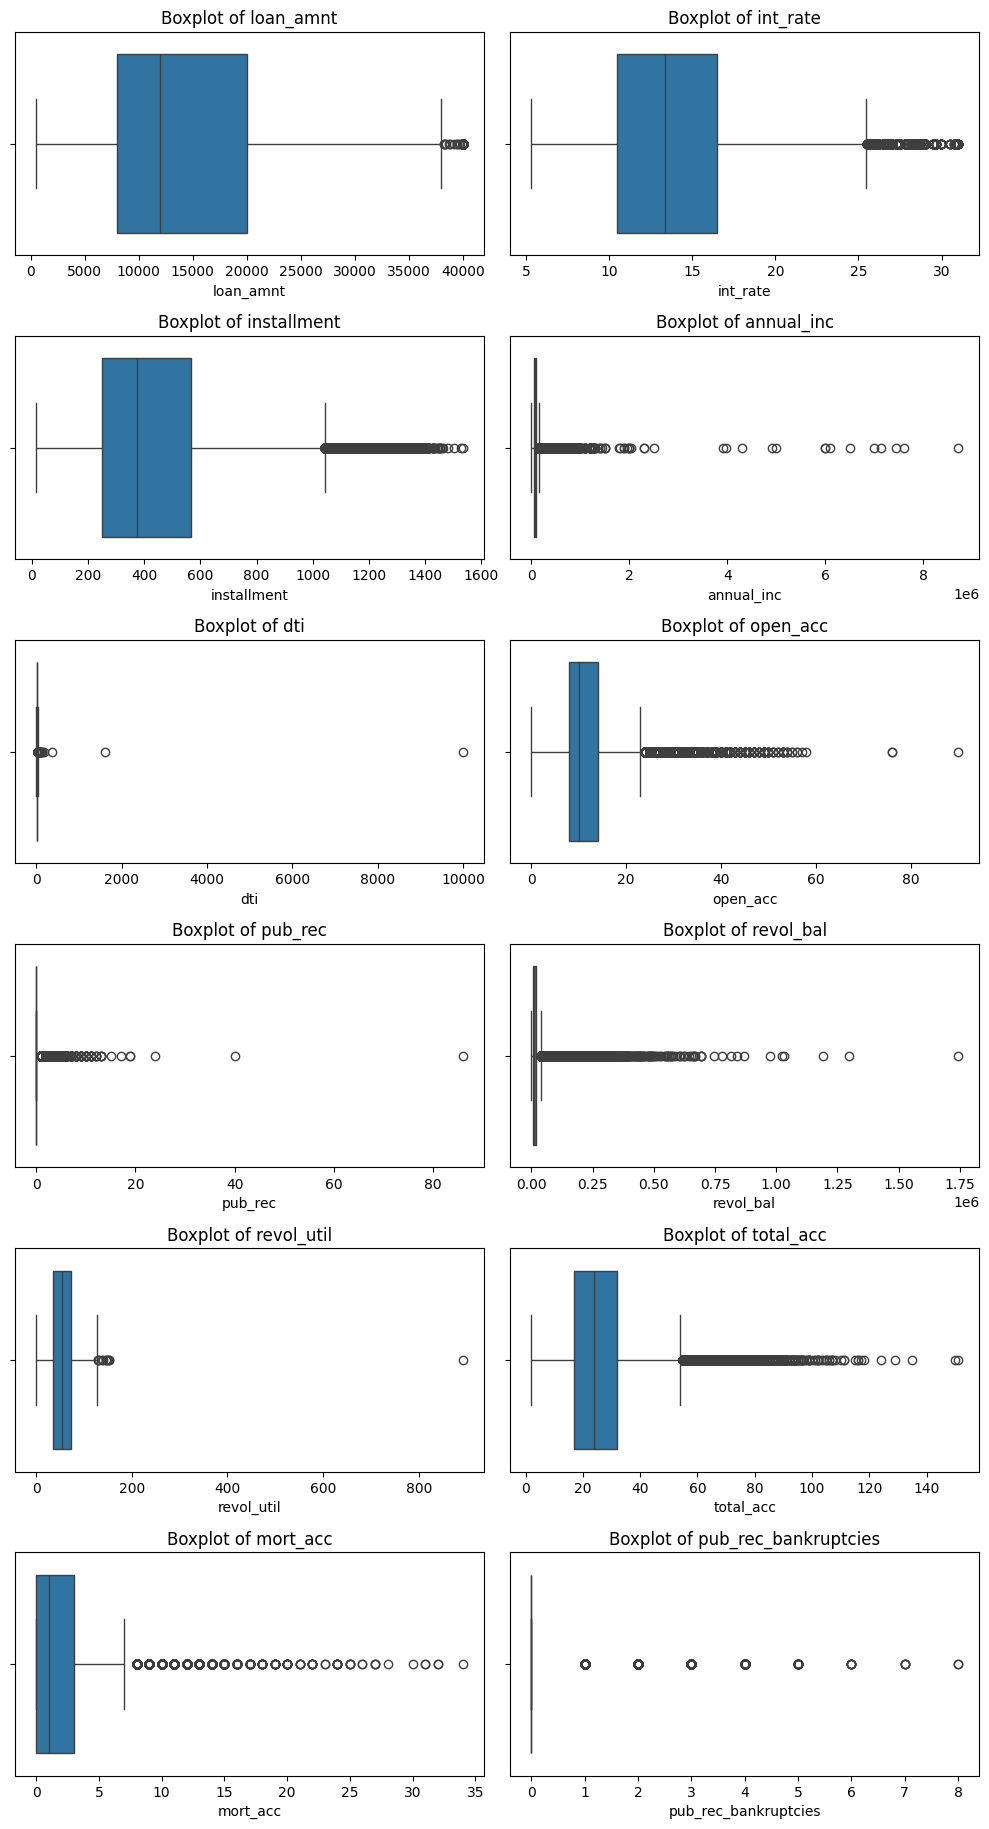

In [38]:
num_cols = df.select_dtypes(include='number').columns

fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='loan_amnt', ylabel='Count'>

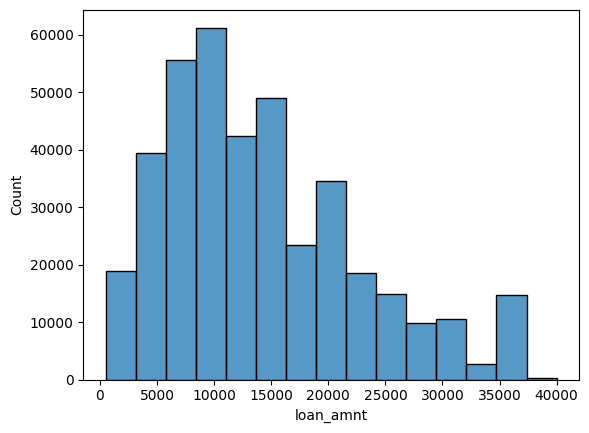

In [39]:
sns.histplot(df["loan_amnt"],bins = 15)

-  for loan status Charged_off, the mean and median of loan_amount is higher than fully paid.
- also the distribution of loan_amnt is right skewed, which says it has outlier presence.

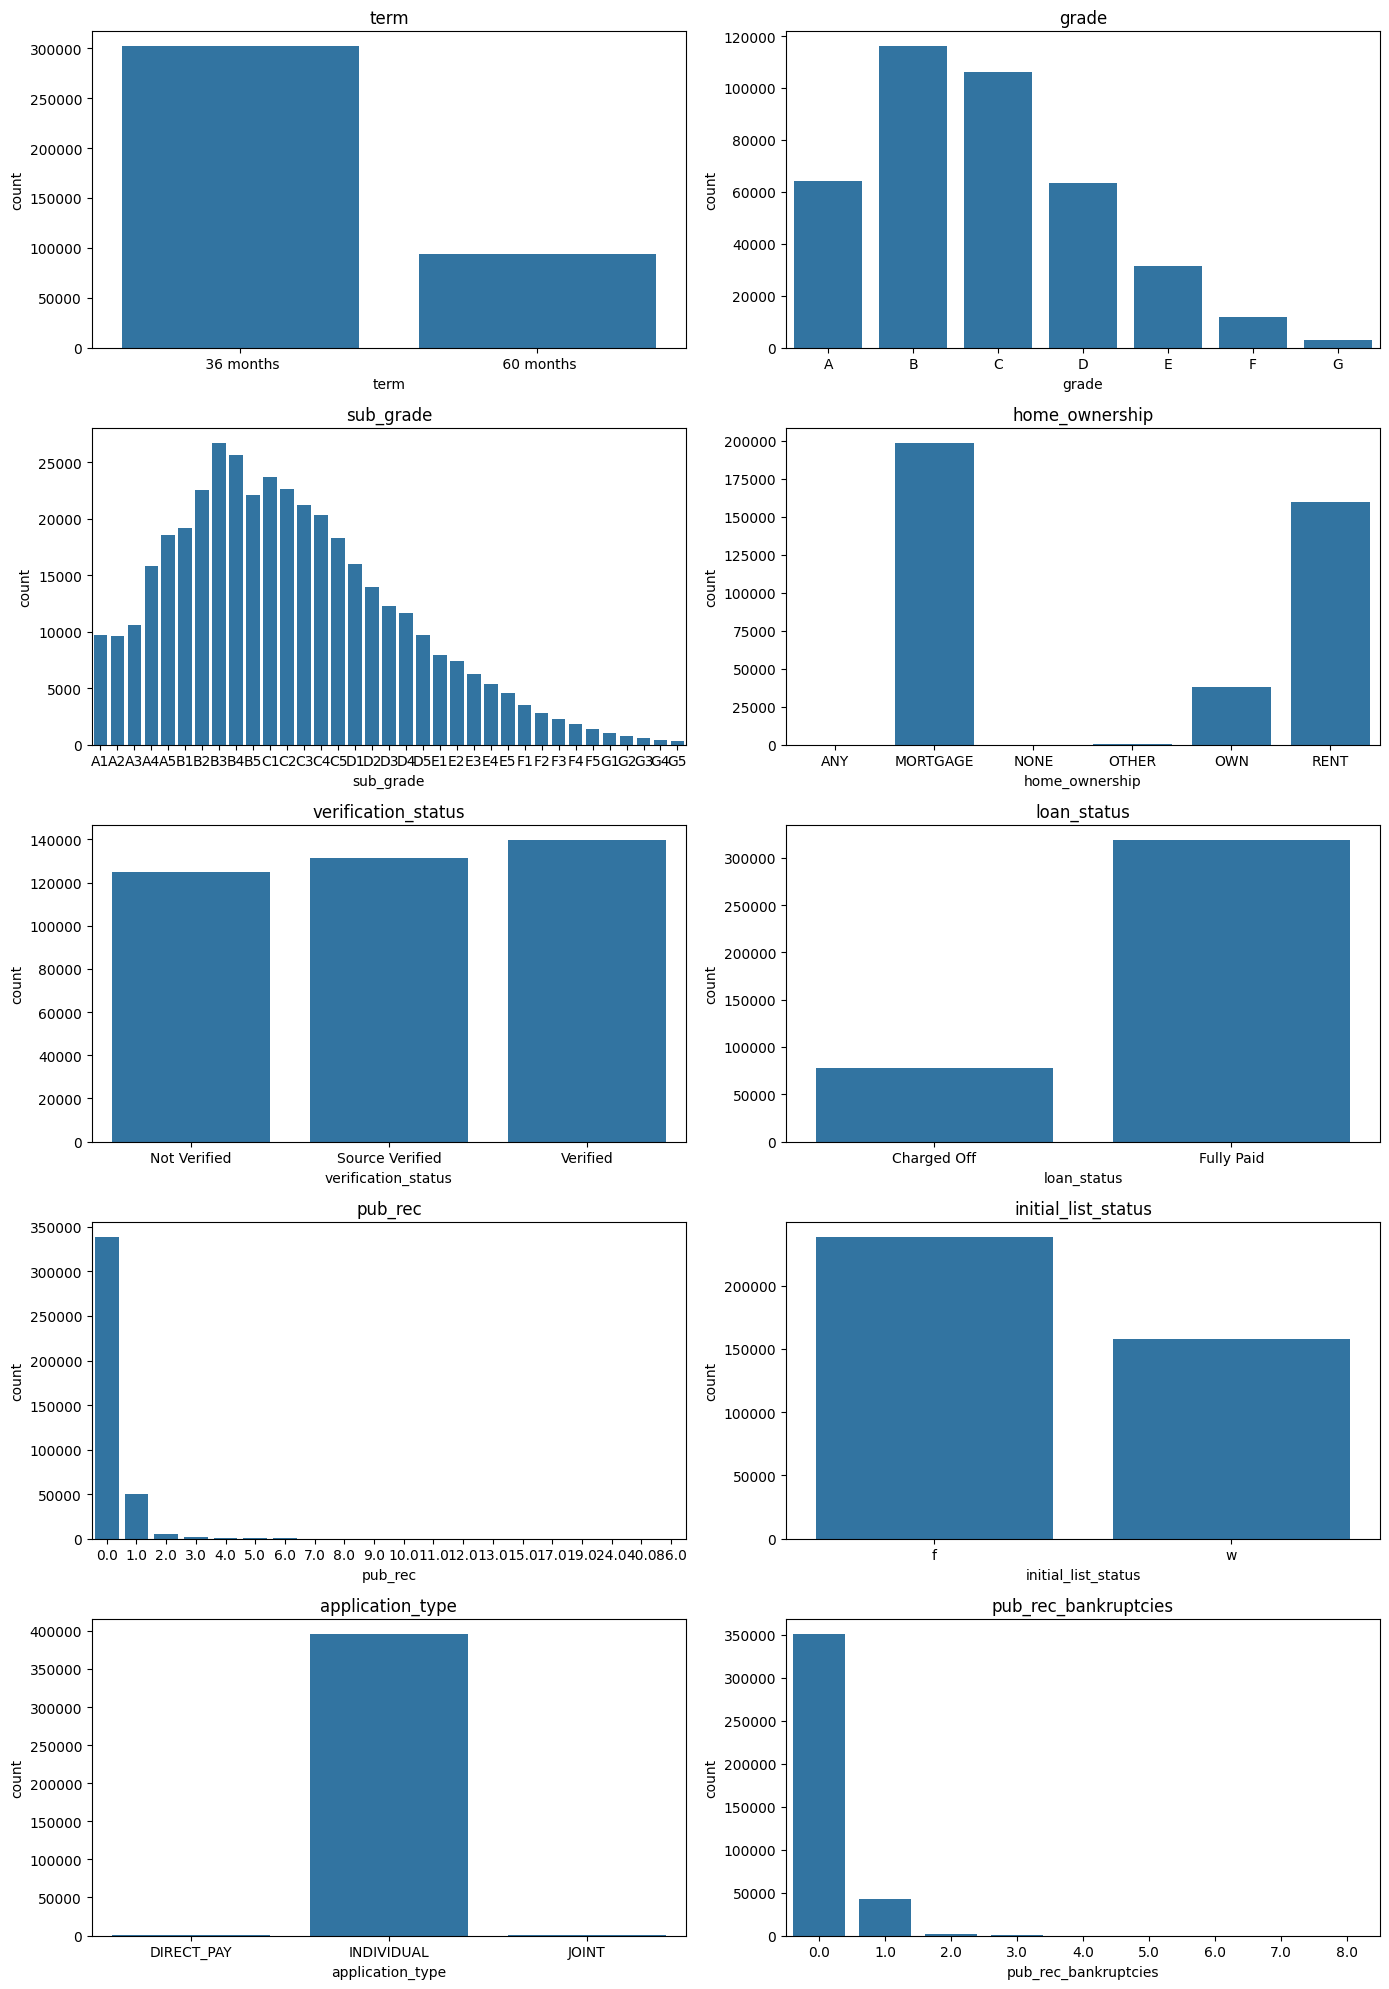

In [40]:
#Distribution of categorical variables
plot = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
i=1
for col in plot:
  ax=plt.subplot(5,2,i)
  sns.countplot(x=df[col])
  plt.title(f'{col}')
  i += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='sub_grade'>

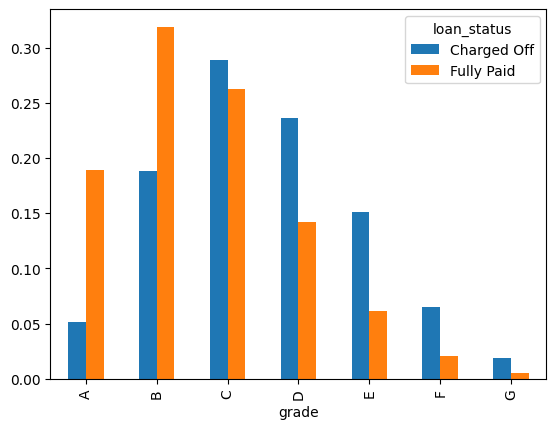

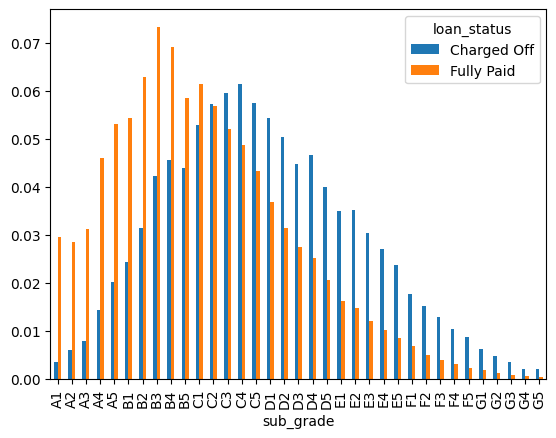

In [41]:
pd.crosstab(index = df["grade"], columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

pd.crosstab(index = df["sub_grade"], columns= df["loan_status"],normalize= "columns", ).plot(kind = "bar")

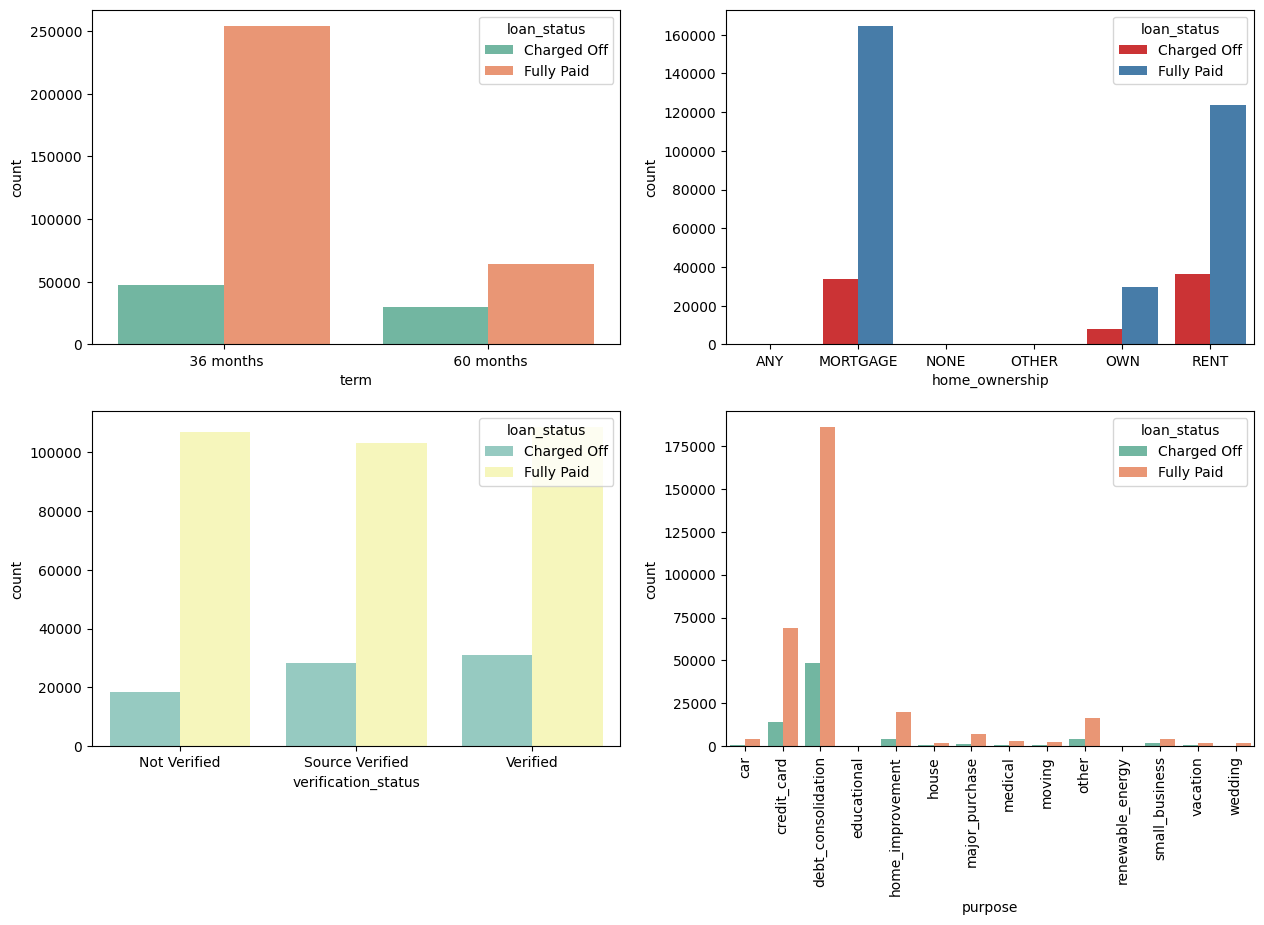

In [42]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status', palette='Set2')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='Set1')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status', palette='Set3')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status', palette='Set2')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

<Axes: xlabel='home_ownership'>

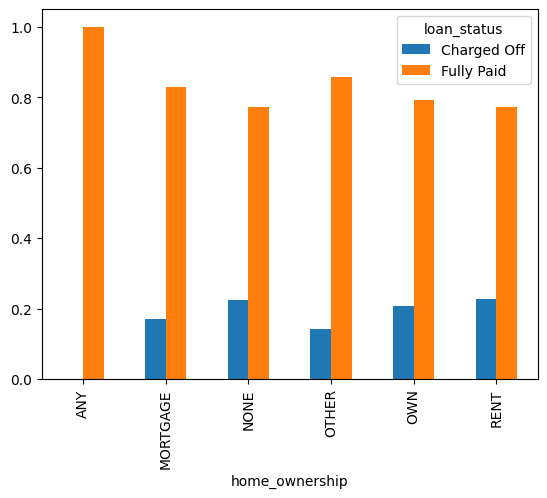

In [43]:
pd.crosstab(index = df["home_ownership"], columns= df["loan_status"],normalize= "index").plot(kind= "bar")

<Axes: xlabel='int_rate', ylabel='loan_status'>

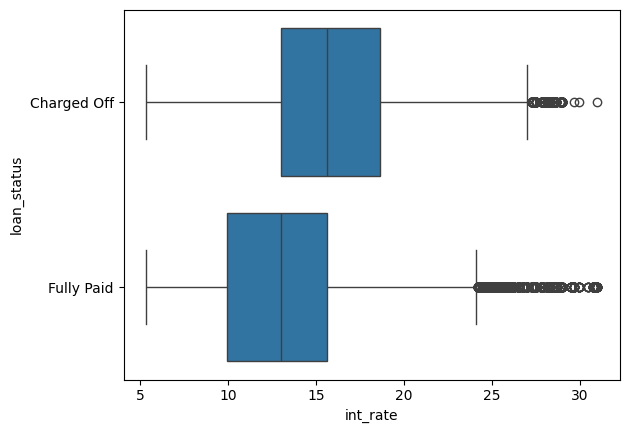

In [44]:
sns.boxplot(x=df["int_rate"],y=df["loan_status"])

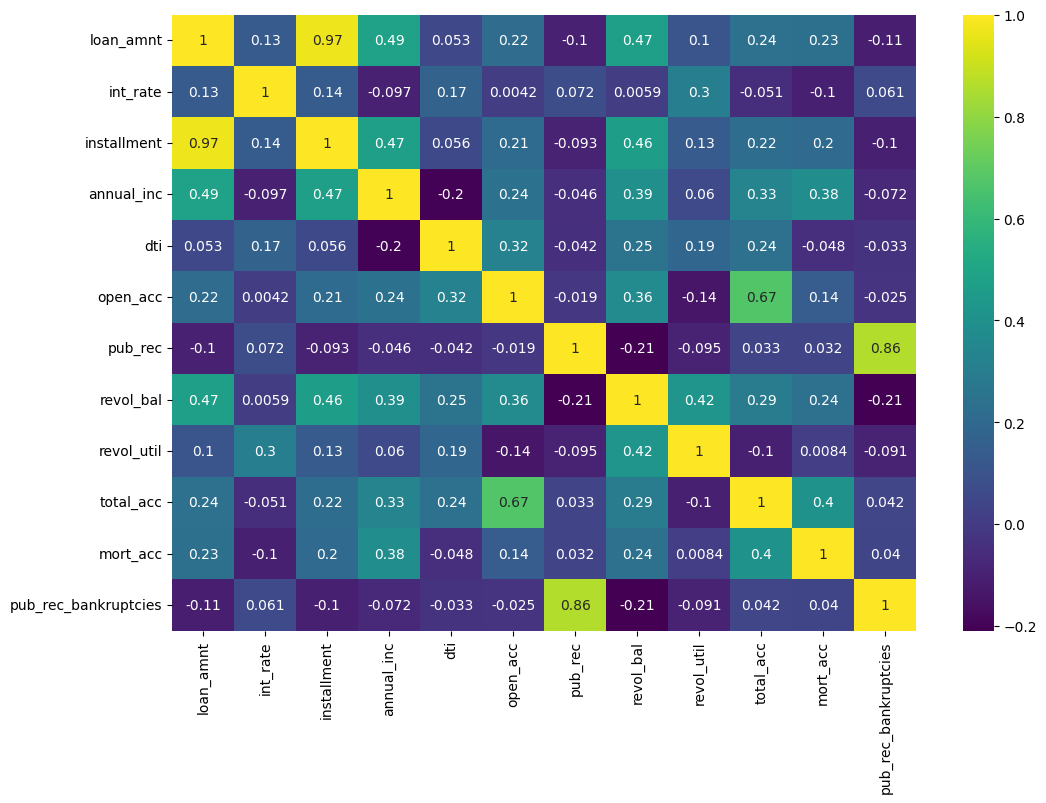

In [46]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

# Data Processing

- In both the 'Categorical' and 'Numerical' categories, there are columns with a significant amount of missing data.
- For the 'Numerical' data, these missing values will be filled with the mean, while for the 'Categorical' data, they will be filled with the mode.

In [47]:
#Check for Duplicate Values
df.duplicated().sum()

np.int64(0)

In [48]:
# Null values replaced by 'Mode' in case of 'Categorical' column.
column_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(column_mode)

# Null values replaced by 'Mean' in case of 'Numerical' column.
for column in ['revol_util', 'mort_acc', 'pub_rec_bankruptcies']:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)

In [49]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,0
home_ownership,0
annual_inc,0


In [50]:
# Dropping some variables which we can let go for now
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

## Feature Engineering

In [51]:
def  pub_rec(number):
    if number == 0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [52]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

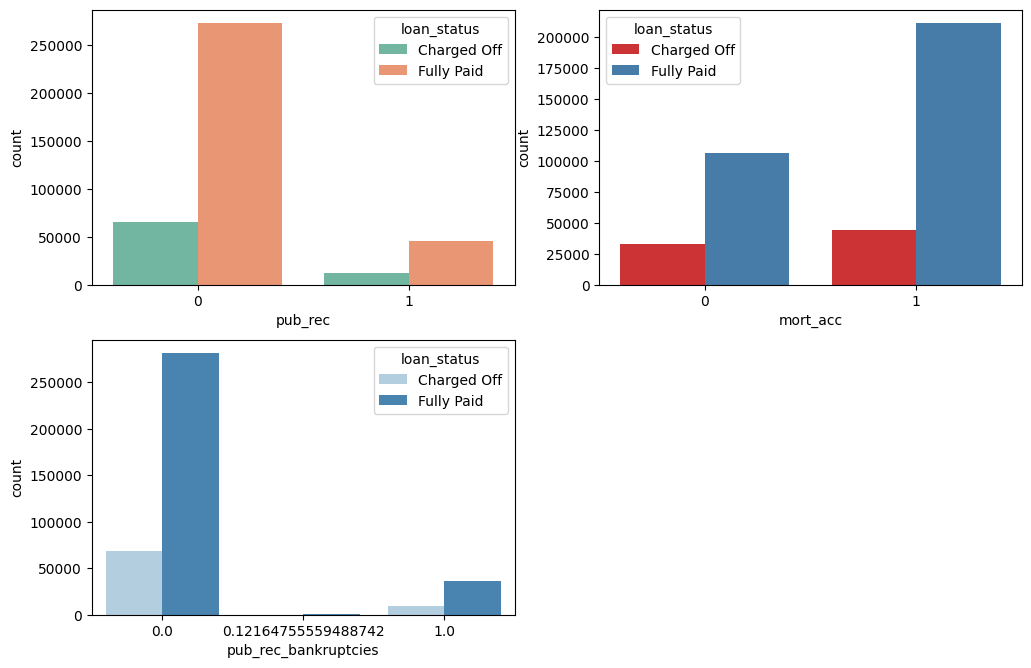

In [53]:
plt.figure(figsize=(12,25))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status', palette='Set2')

plt.subplot(6,2,2)
sns.countplot(x='mort_acc',data=df,hue='loan_status', palette='Set1')

plt.subplot(6,2,3)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status', palette='Blues')

In [54]:
#pre processing
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

## Outlier Detection & Treatment

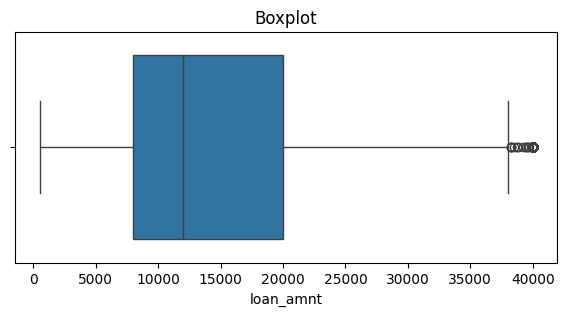

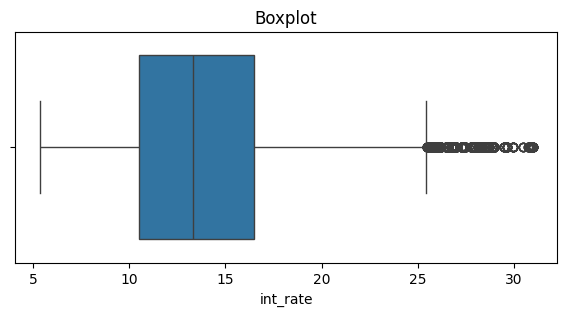

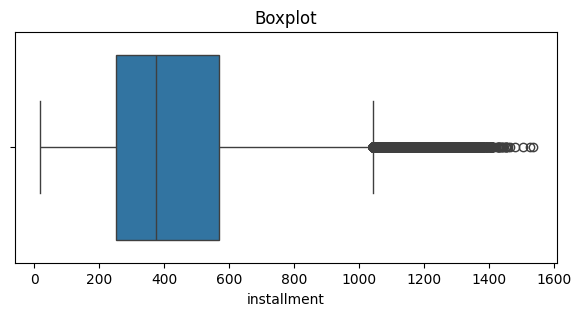

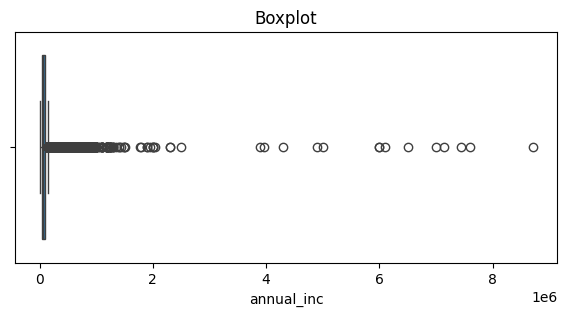

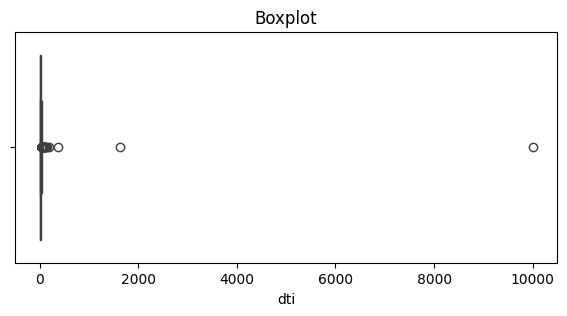

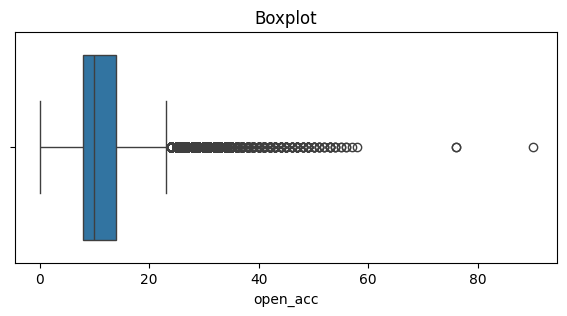

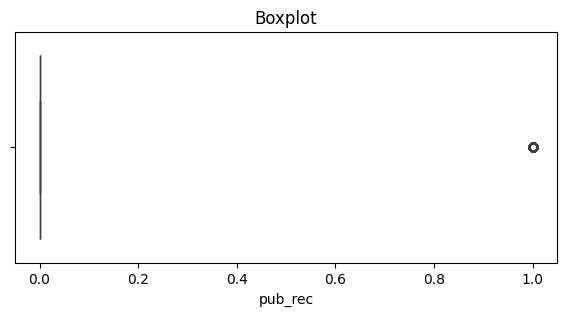

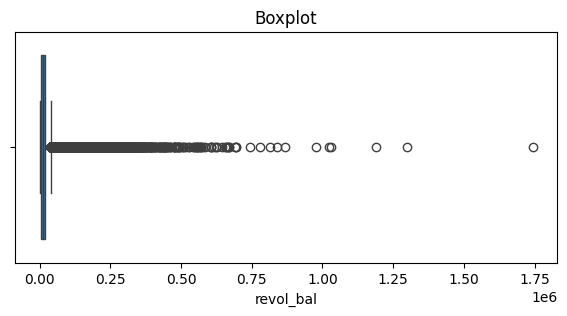

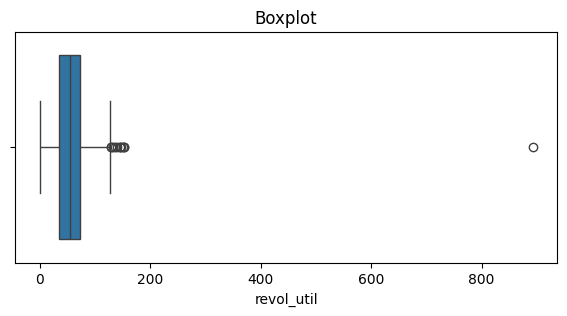

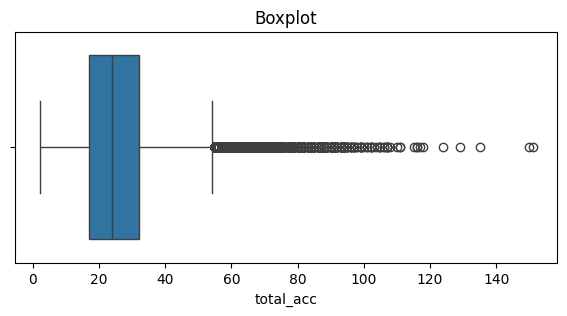

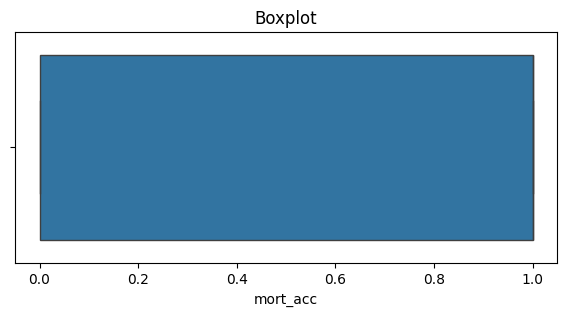

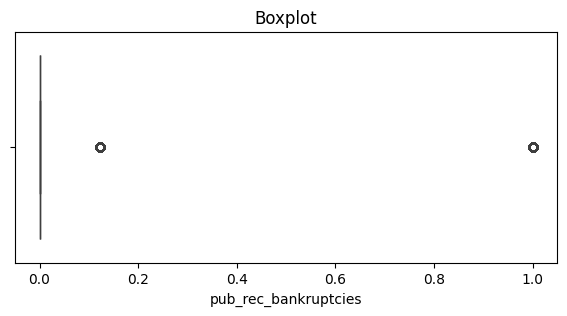

In [55]:
numerical_col=df.select_dtypes(include='number')
num_cols=numerical_col.columns

def box_plot(col):
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)

In [56]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

## One Hot Encoding

In [57]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,pin_code,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,0.0,22690,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0.0,05113,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0.0,05113,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0.0,00813,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0.0,11650,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


## Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split
X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=3,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(299649, 52)
(74913, 52)


## MinMaxScaler

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [60]:
X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,pin_code,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0.429230,0.0,0.518228,0.497159,0.233871,0.284874,0.461538,0.0,0.286772,0.577453,0.315789,0.0,0.0,0.0,0.508564,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.266623,0.0,0.461006,0.303769,0.229032,0.248459,0.346154,0.0,0.169182,0.765612,0.245614,1.0,0.0,0.0,0.749868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.039500,0.0,0.359483,0.044141,0.125000,0.267927,0.269231,0.0,0.064800,0.529603,0.263158,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.232390,0.0,0.106138,0.235643,0.147056,0.263725,0.230769,0.0,0.242481,0.623682,0.315789,1.0,1.0,0.0,0.749868,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.131007,0.0,0.059991,0.130509,0.177419,0.135574,0.269231,0.0,0.081237,0.224655,0.263158,1.0,1.0,0.0,0.309882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Oversampling with SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 58851
Before OverSampling, count of label 0: 240798
After OverSampling, count of label 1: 240798
After OverSampling, count of label 0: 240798


## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [66]:
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

#Model Evaluation
print('Train Accuracy :', round(model.score(X_train, y_train), 2))
print('Train F1 Score:',round(f1_score(y_train,train_preds), 2))
print('Train Recall Score:',round(recall_score(y_train,train_preds), 2))
print('Train Precision Score:',round(precision_score(y_train,train_preds), 2))

print('\nTest Accuracy :',round(model.score(X_test,y_test), 2))
print('Test F1 Score:',round(f1_score(y_test,test_preds), 2))
print('Test Recall Score:',round(recall_score(y_test,test_preds), 2))
print('Test Precision Score:',round(precision_score(y_test,test_preds), 2))

Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49


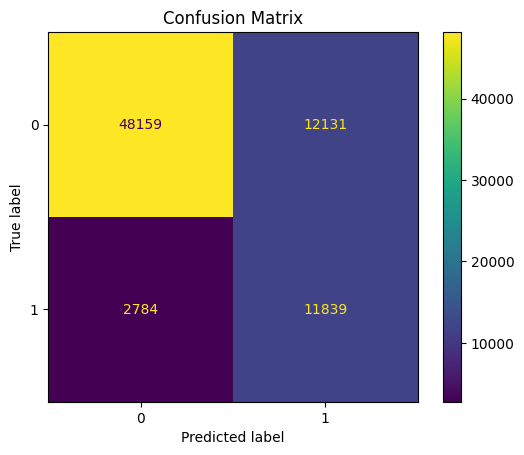

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [68]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     60290
           1       0.49      0.81      0.61     14623

    accuracy                           0.80     74913
   macro avg       0.72      0.80      0.74     74913
weighted avg       0.86      0.80      0.82     74913



- We notice that the recall score is notably high, indicating our model can identify 80% of actual defaulters. However, the precision for the positive class is low; only 50% of the predicted defaulters are actual defaulters.
- While this model effectively identifies a significant portion of defaulters, it risks denying loans to deserving customers due to the high rate of false positives.

- Furthermore, the low precision contributes to a decrease in the F1 score to 60%, despite the accuracy being 80%.

### Feature Importance

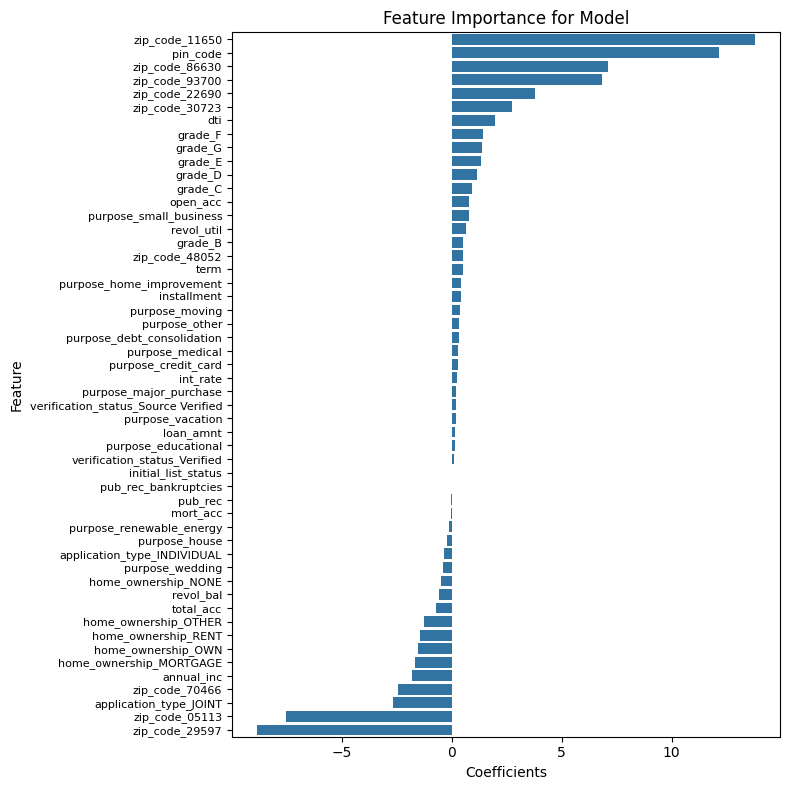

In [69]:
feature_imp = pd.DataFrame({'Columns':X_train.columns,
                            'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## ROC Curve & AUC

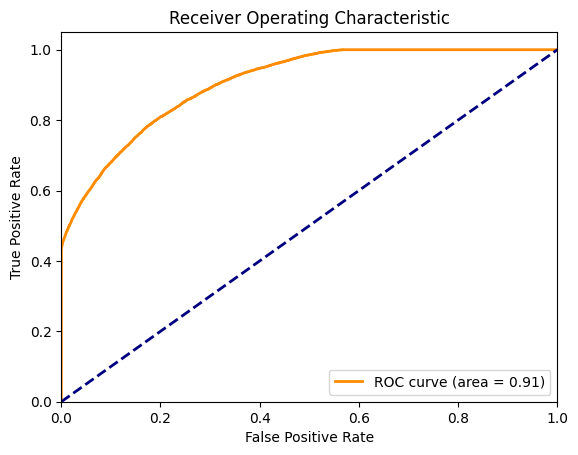

In [70]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- An AUC of 0.91 indicates that the model effectively distinguishes between the positive and negative classes.
- However, it's not an ideal metric for imbalanced target variables since it can be high even when the classifier performs poorly on the minority class.

- This discrepancy occurs when the classifier excels at classifying instances from the majority class, which are more prevalent in the dataset. Consequently, the AUC might appear high, masking the model's inability to accurately identify instances from the minority class.

### Precision Recall Curve

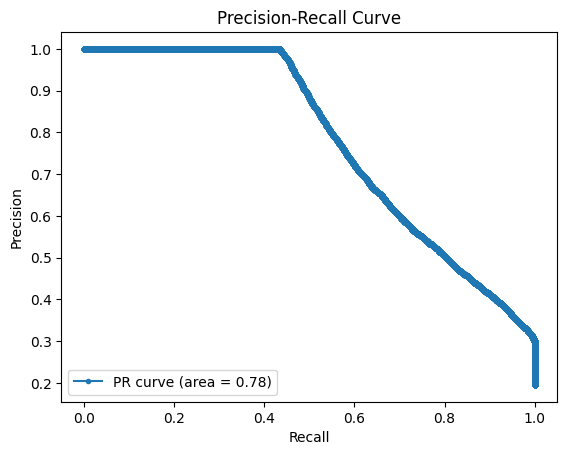

In [71]:
precision, recall, thr = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
apc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % apc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

The area under the precision-recall curve (AUC-PR) is not as high as desired. While it exceeds the benchmark of 0.5 for a random model, indicating some level of effectiveness.

# Conclusion


**Q1.** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Ans:** The precision score serves as an indicator of Type I error. By increasing the precision score of the model, we can minimize false positives. This ensures that the company avoids erroneously denying loans to deserving individuals, thus maximizing the opportunity to finance worthy applicants.

**Q2.** Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

**Ans:** The recall score serves as an indicator of how effectively the model identifies actual defaulters. By increasing the recall score, we can minimize false negatives (Type II error), thereby ensuring that loans are not disbursed to defaulters, thus enhancing the model's ability to identify risky applicants.

# Insights

- 80% belongs to the class 0 : which is loan fully paid.

- 20% belongs to the class 1 : which were charged off.

- Loan Amount distribution / media is slightly higher for Charged_off loanStatus.
- the probability of defaulters is higher in the small_business owner borrowers.
- Total credit revolving balance is almost same for both borrowers who had fully paid loan and declared defaulter
- Probability of CHarged_off status is higher in case of 60 month term.
- Zip codes such as 11650, 86630 and 93700 have 100% defaulters
- It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters.

- The % of defaulters is much higher for longer (60-month) term.
- A Logistic Regression model performed well, rendering accuracy of 80%.
- We can remove initial_list_status and state as they have no impact on loan_status
- The model had a precision score of 95%, recall score of 80%, and f1 score of 87% on the negative class.
- The model had a precision score of 49%, recall score of 81%, and f1 score of 61% on the positive class.
- The features "grade" and "sub-grade" have the most significant impact on the loan_status, with higher grades typically associated with a higher likelihood of default. In particular, loans assigned the highest grade tend to have the highest proportion of defaulters.

# Recommendations

- Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.

- Prioritize 'A' grade applicants and shorter-term loans for lower default risk.
-  Balancing  risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible is to maximize the F1 score along with the area under the Precision-Recall Curve.